## Question 6 -
### Using the data from Question 3, write code to analyze the data and answer the following questions 
### Note 
- 1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
- 2. Write code comments wherever required for code understanding
### Insights to be drawn -
- ● Get all Pokemons whose spawn rate is less than 5%
- ● Get all Pokemons that have less than 4 weaknesses
- ● Get all Pokemons that have no multipliers at all
- ● Get all Pokemons that do not have more than 2 evolutions
- ● Get all Pokemons whose spawn time is less than 300 seconds.
- Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- ● Get all Pokemon who have more than two types of capabilities


In [1]:
## importing required libraries

import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
## reading json file
df = pd.read_excel("pokemon_data.xlsx")
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","002: Ivysaur, 003: Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",003: Venusaur,001: Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001: Bulbasaur, 002: Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","005: Charmeleon, 006: Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",006: Charizard,004: Charmander


In [6]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['spawn_chance'] < 5]

In [9]:
# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df['weakness'].str.count(',') < 3]

In [10]:
# Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].isnull()]

In [11]:
# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df['next_evolution'].str.count(',') < 2]

In [12]:
# Convert spawn time to seconds
df['spawn_time_seconds'] = pd.to_datetime(df['spawn_time'], format='%M:%S').dt.minute * 60 + pd.to_datetime(df['spawn_time'], format='%M:%S').dt.second


In [13]:
# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df['spawn_time_seconds'] < 300]

In [14]:
# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['type'].str.count(',') > 1]

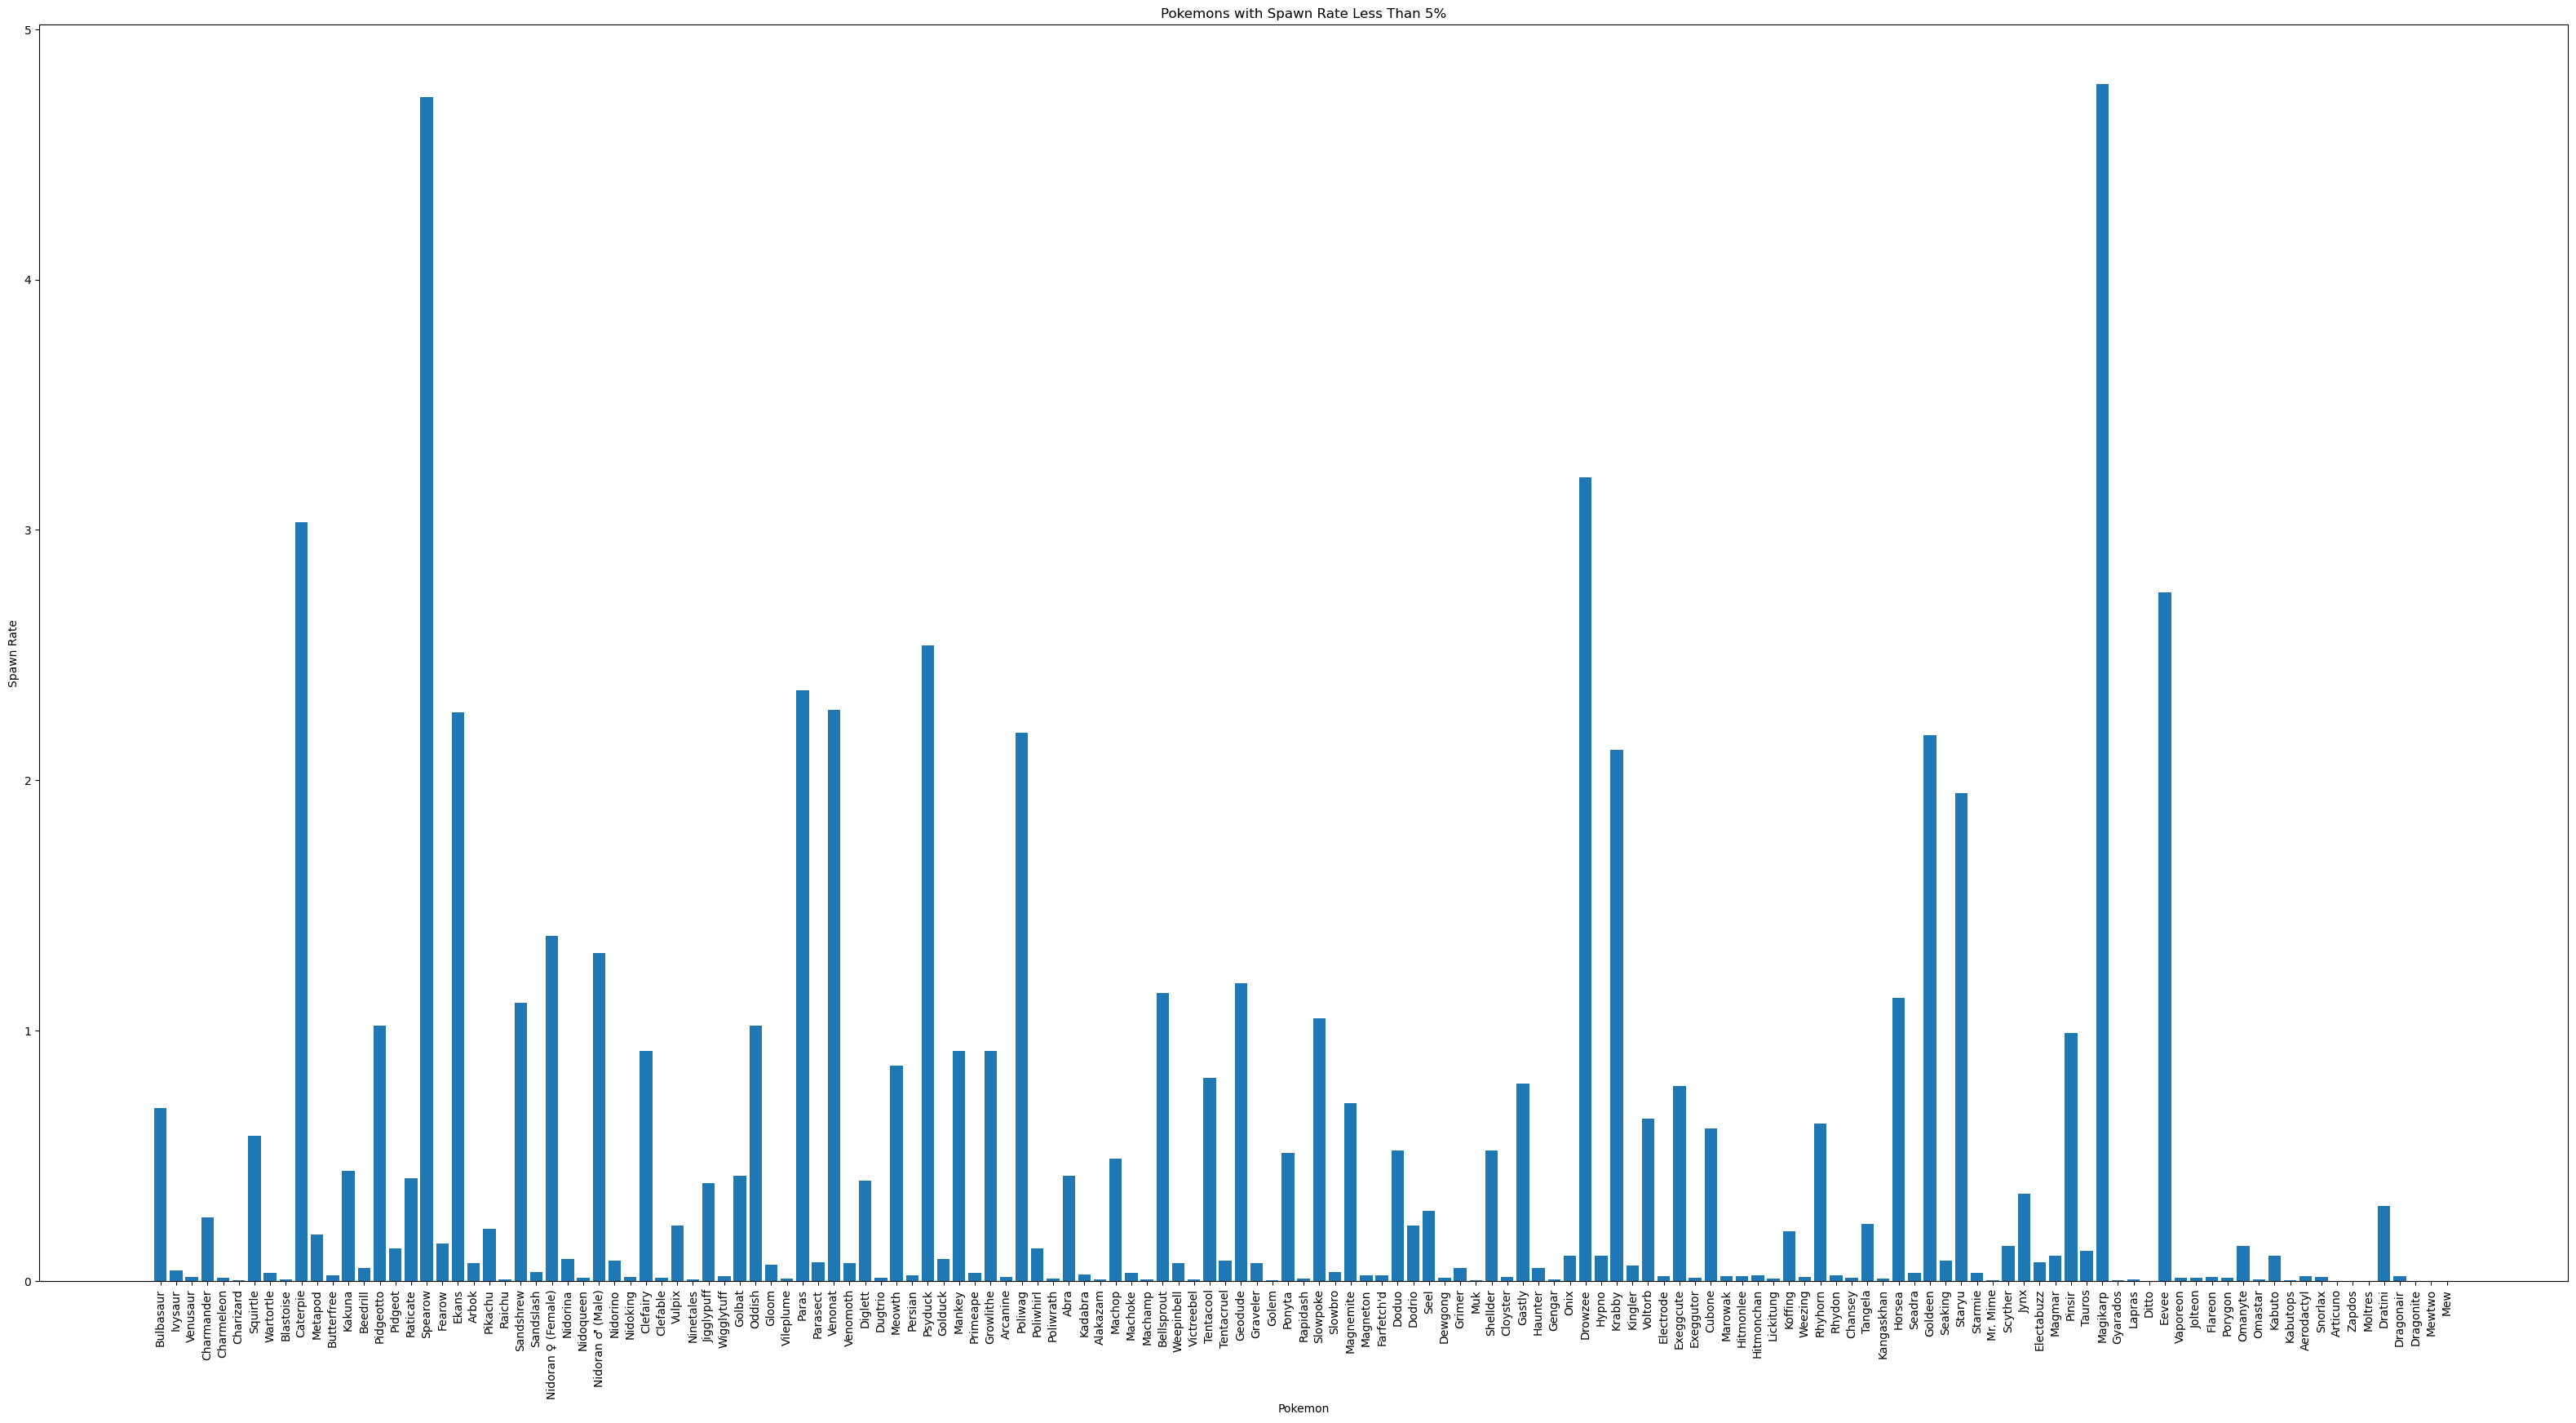

In [15]:
# Plotting the analysis

# Bar plot for spawn rate less than 5%
plt.figure(figsize=(40, 20))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Rate')
plt.title('Pokemons with Spawn Rate Less Than 5%')
plt.xticks(rotation=90)
plt.show()

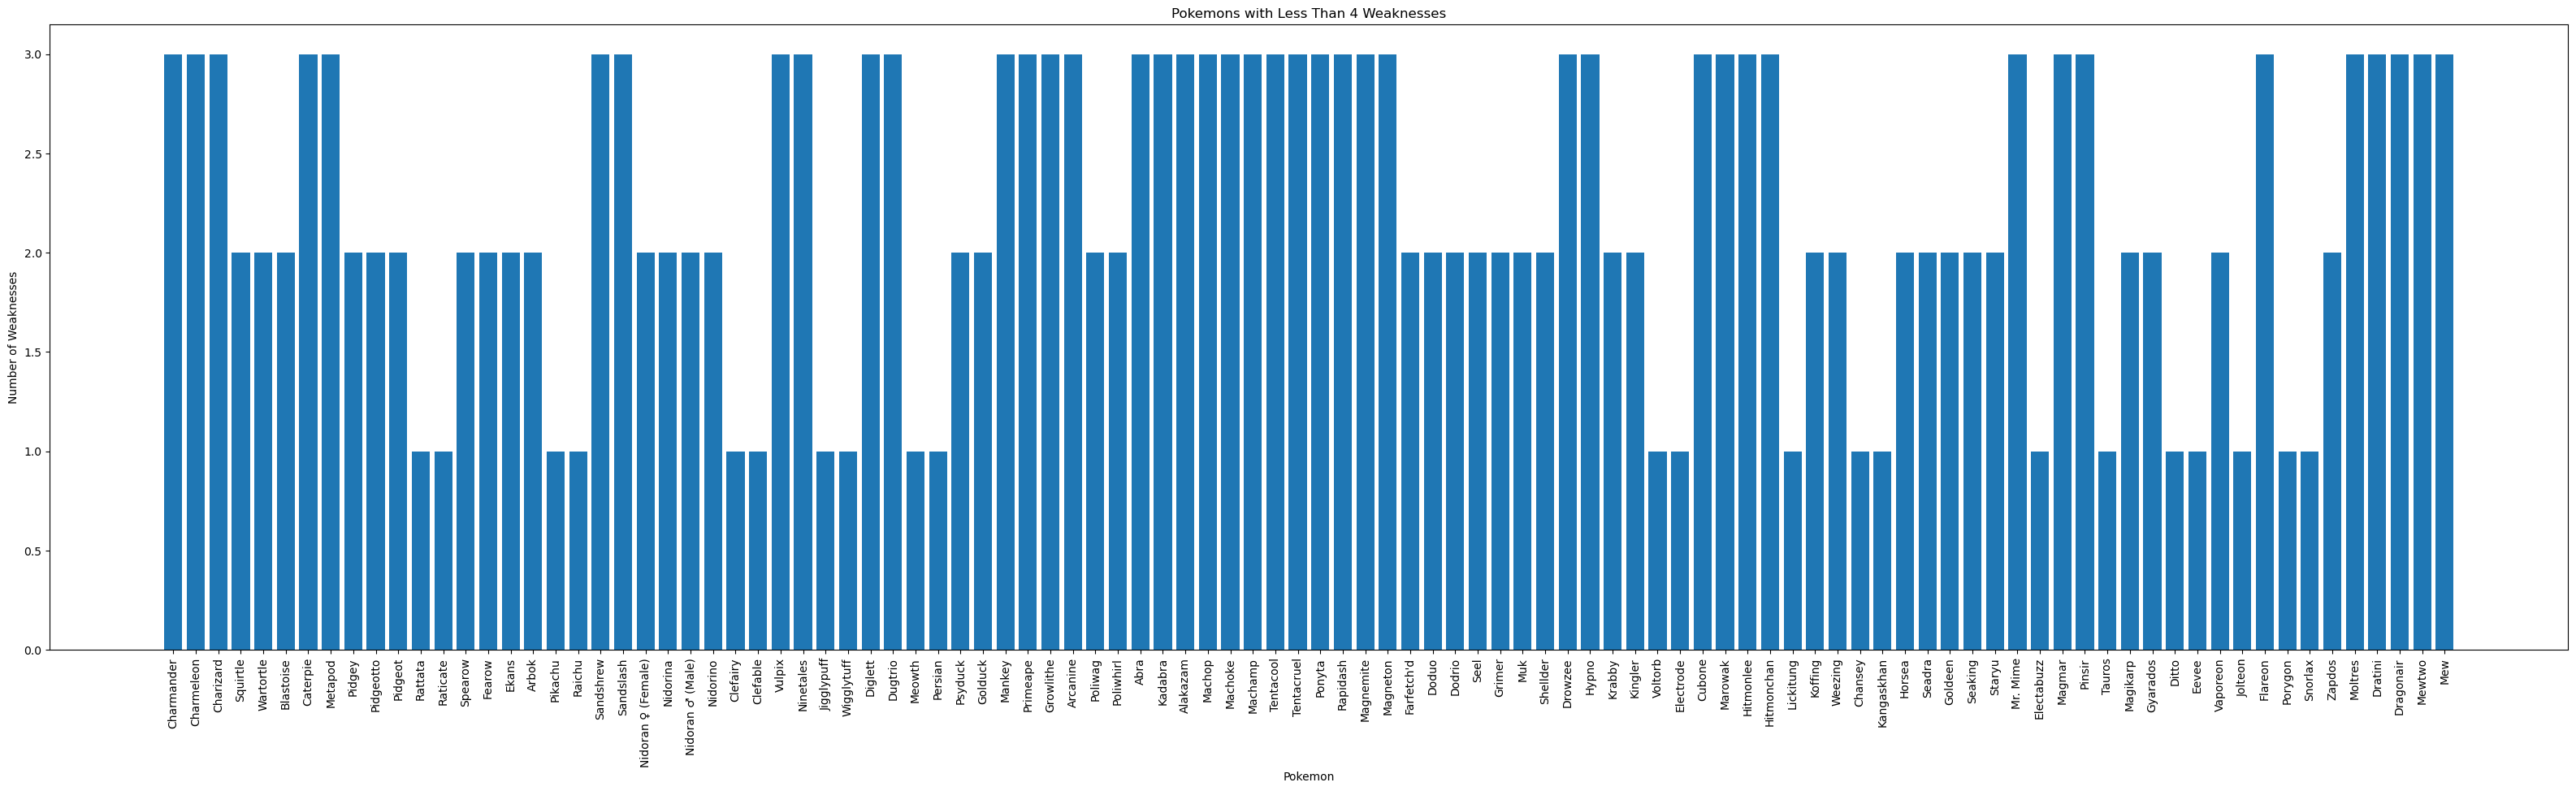

In [16]:
# Bar plot for Pokemons with less than 4 weaknesses
plt.figure(figsize=(40, 10))
plt.bar(less_than_4_weaknesses['name'], less_than_4_weaknesses['weakness'].str.count(',') + 1)
plt.xlabel('Pokemon')
plt.ylabel('Number of Weaknesses')
plt.title('Pokemons with Less Than 4 Weaknesses')
plt.xticks(rotation=90)
plt.show()

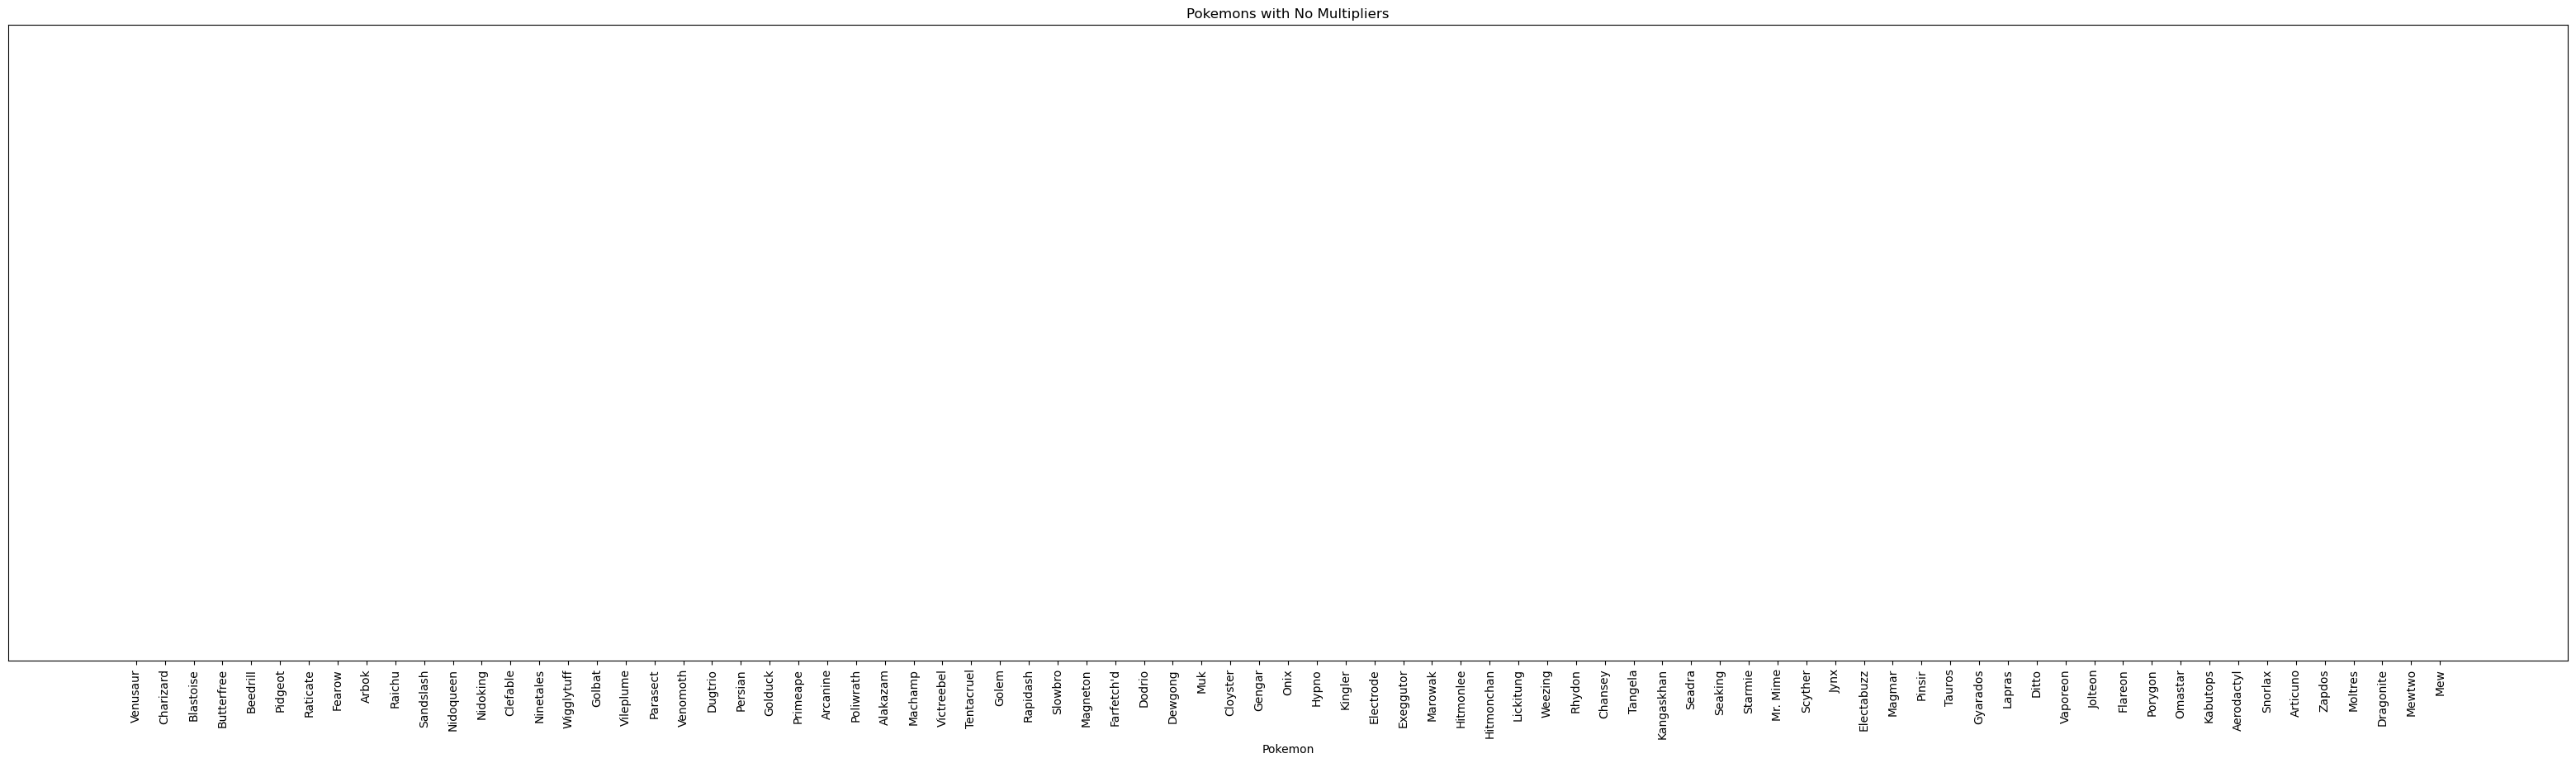

Number of Pokemons with No Multipliers: 0


In [18]:
# Bar plot for Pokemons with no multipliers
plt.figure(figsize=(40, 10))
plt.bar(no_multipliers['name'], 0)
plt.xlabel('Pokemon')
plt.title('Pokemons with No Multipliers')
plt.xticks(rotation=90)
plt.yticks([])
plt.show()
# Filter Pokemons with no multipliers
filtered_data = df[df['multipliers'] == '']
# Get the count of Pokemons with no multipliers
count = len(filtered_data)
# Print the count
print("Number of Pokemons with No Multipliers:", count)

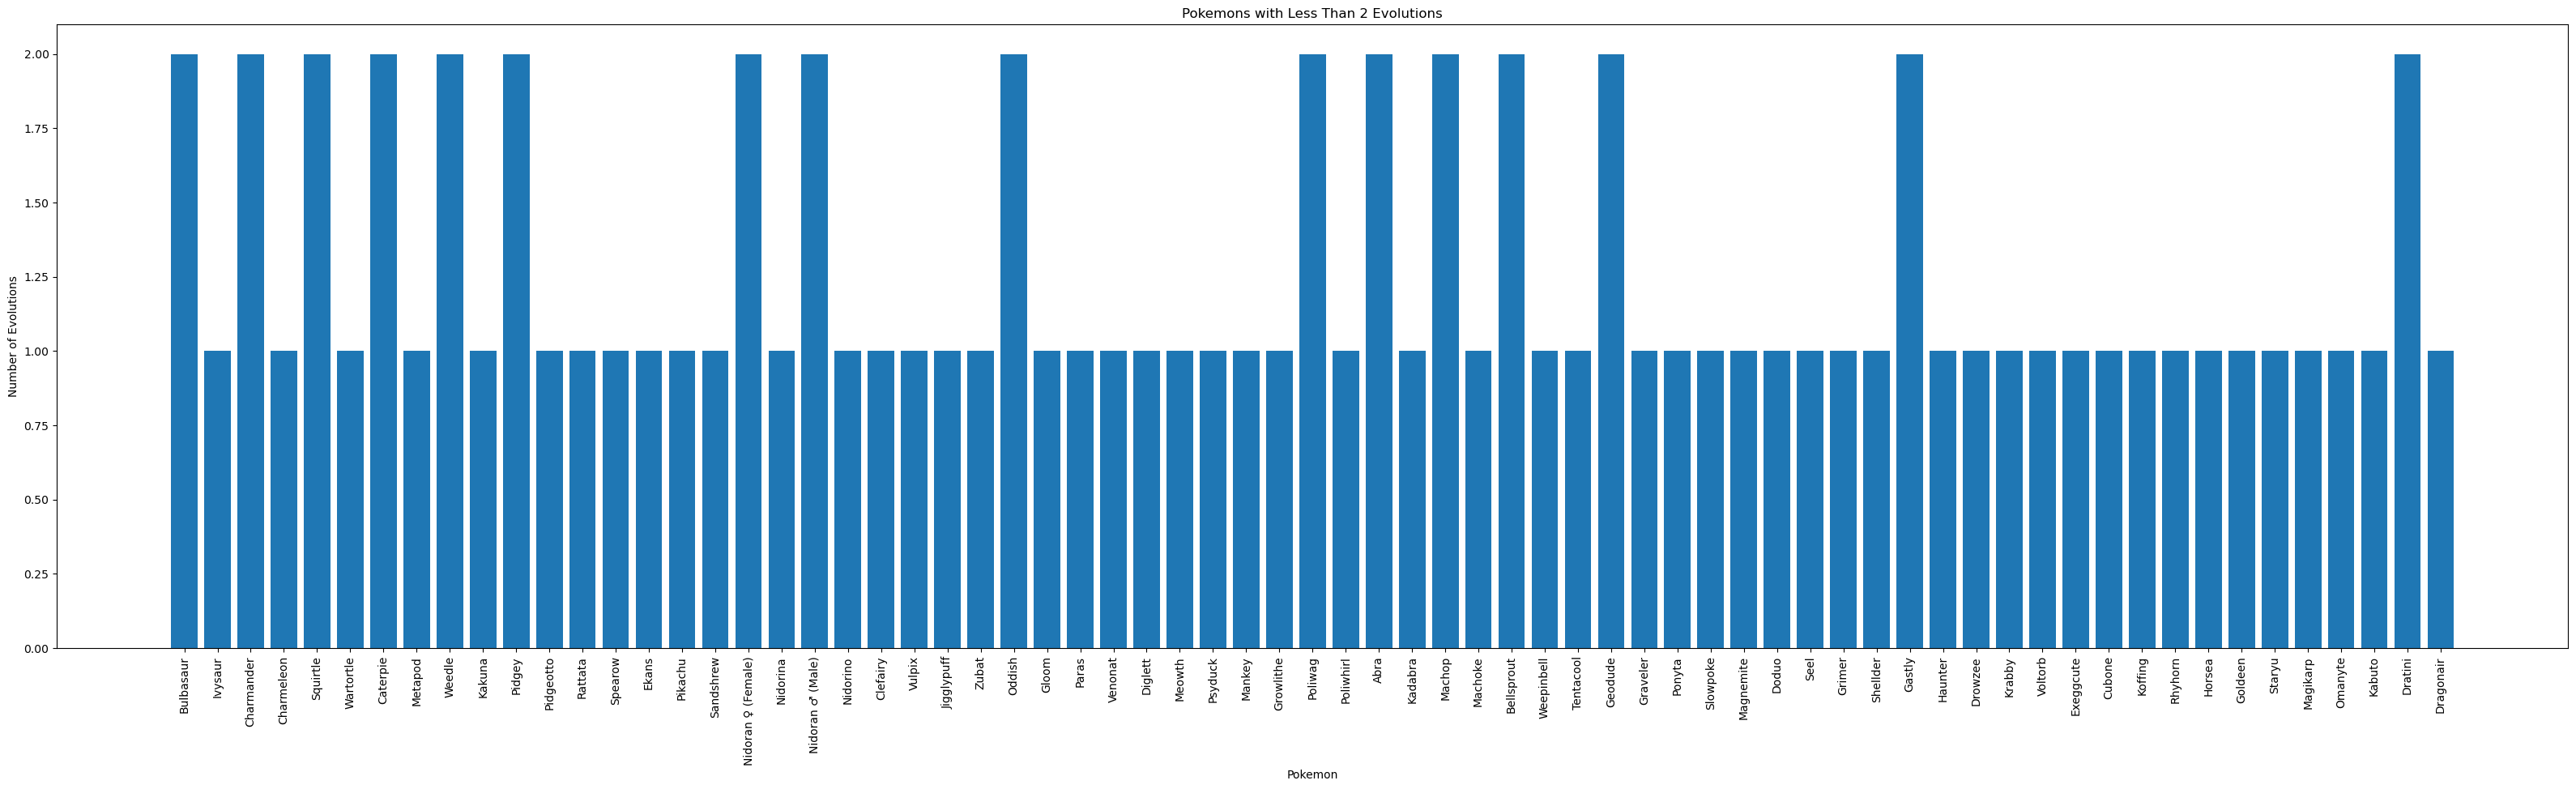

In [19]:
# Bar plot for Pokemons with less than 2 evolutions
plt.figure(figsize=(40, 10))
plt.bar(less_than_2_evolutions['name'], less_than_2_evolutions['next_evolution'].str.count(',') + 1)
plt.xlabel('Pokemon')
plt.ylabel('Number of Evolutions')
plt.title('Pokemons with Less Than 2 Evolutions')
plt.xticks(rotation=90)
plt.show()

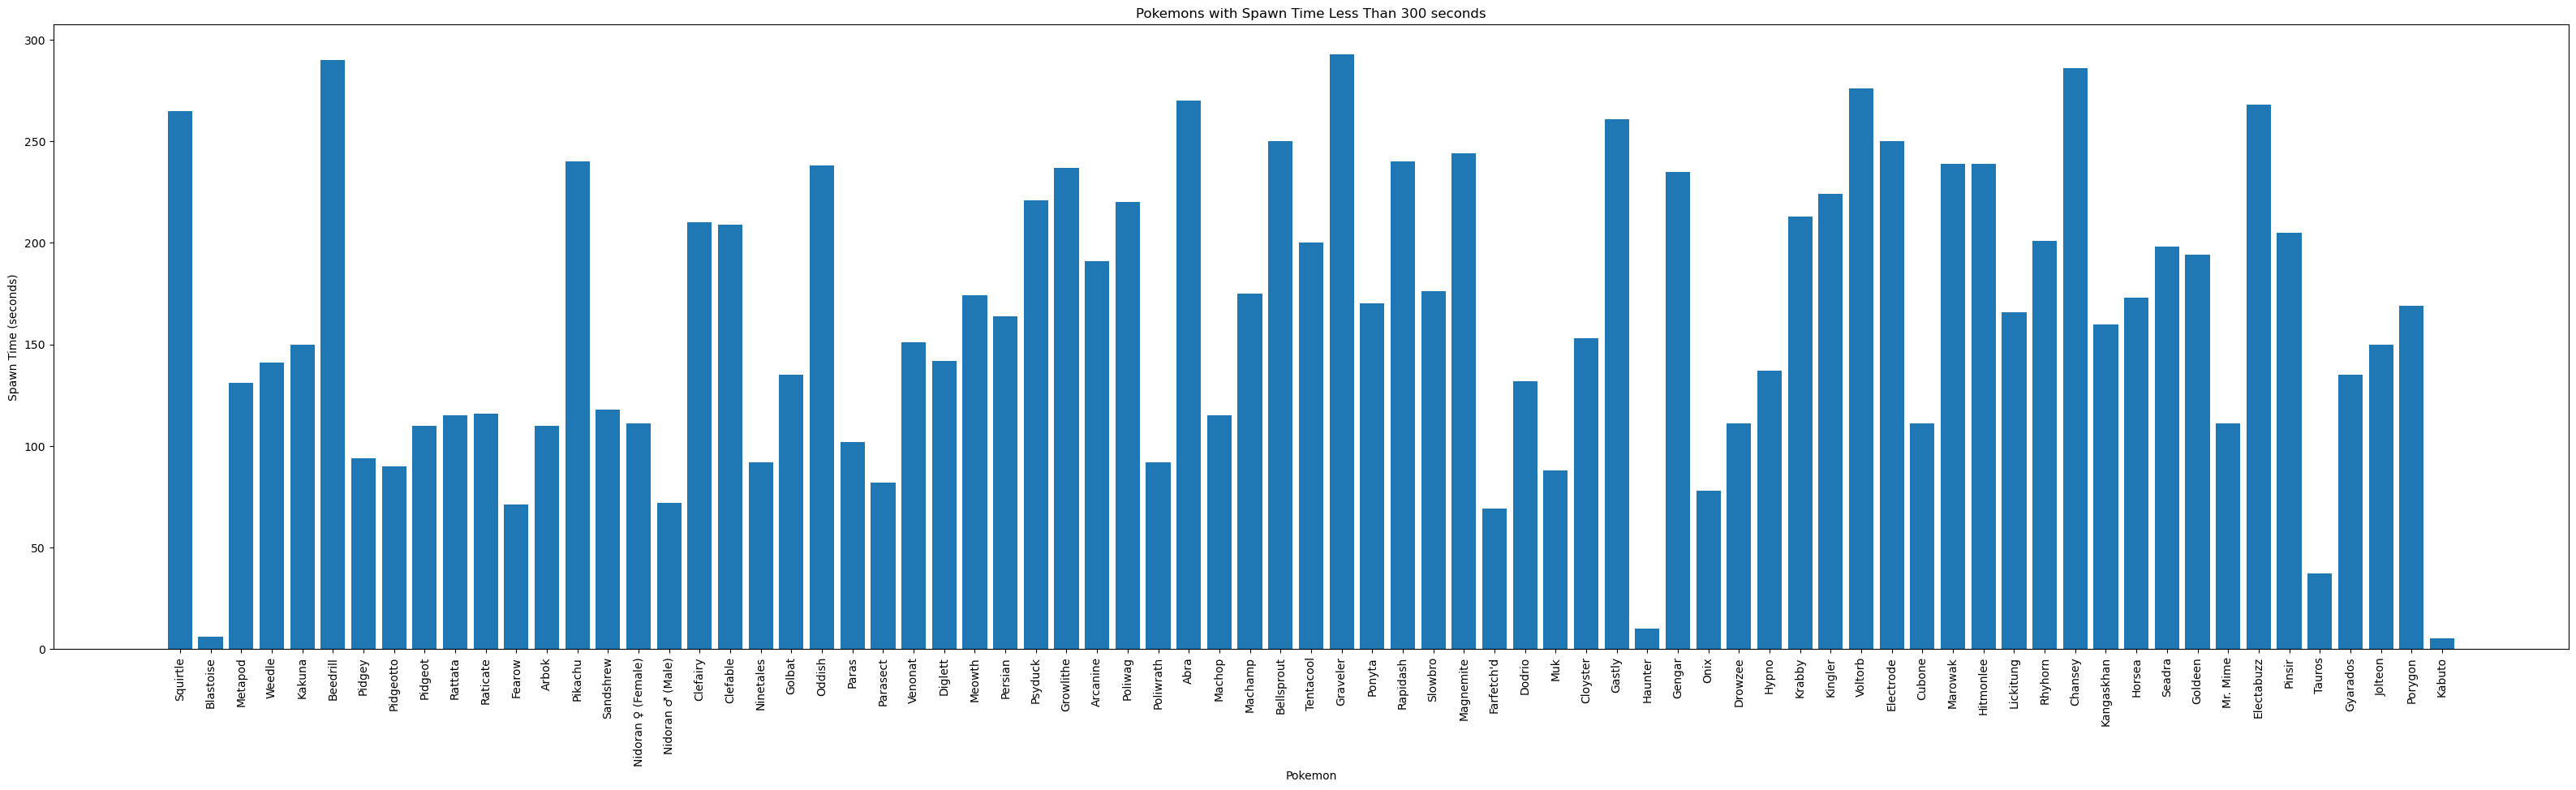

In [20]:
# Bar plot for Pokemons with spawn time less than 300 seconds
plt.figure(figsize=(40, 10))
plt.bar(spawn_time_less_than_300['name'], spawn_time_less_than_300['spawn_time_seconds'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Time (seconds)')
plt.title('Pokemons with Spawn Time Less Than 300 seconds')
plt.xticks(rotation=90)
plt.show()

[]
NO such Pokemon who have more than two types of capabilities


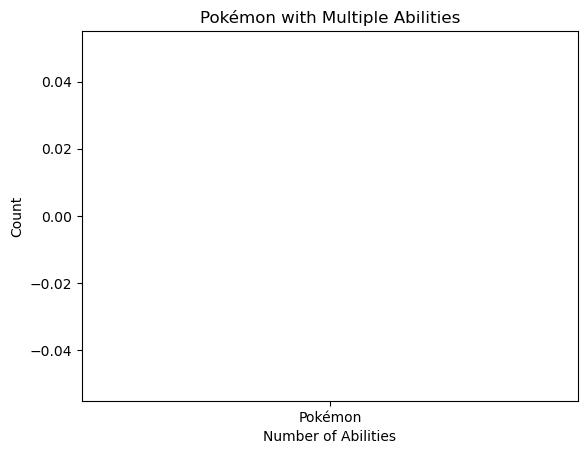

In [21]:
def get_pokemon_with_multiple_abilities():
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('pokemon_data.xlsx')
    
    # Create a new column to count the number of abilities for each Pokémon
    df['type'] = df['type'].apply(lambda x: len(x.split(', ')))
    
    # Filter the DataFrame to include only the Pokémon with more than two abilities
    filtered_df = df[df['type'] > 2]
    
    # Get the names of the Pokémon with multiple abilities
    pokemon_names = filtered_df['name'].tolist()
    
    return pokemon_names

# Call the function to get the Pokémon with multiple abilities
pokemon_list = get_pokemon_with_multiple_abilities()

# Print the list of Pokémon with multiple abilities
print(pokemon_list)
if pokemon_list == []:
    print("NO such Pokemon who have more than two types of capabilities")

# Create a bar plot for the count of Pokémon with multiple abilities
plt.bar(['Pokémon'], [len(pokemon_list)])
plt.xlabel('Number of Abilities')
plt.ylabel('Count')
plt.title('Pokémon with Multiple Abilities')
plt.show()